In [1]:
import os
import shutil

In [2]:
origin_dir = '/content/dohai90/datasets/dogs_vs_cats_data'

base_dir = os.path.join(origin_dir, 'small_set')
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

dogs_train_dir = os.path.join(train_dir, 'dogs')
os.mkdir(dogs_train_dir)
dogs_validation_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(dogs_validation_dir)
dogs_test_dir = os.path.join(test_dir, 'dogs')
os.mkdir(dogs_test_dir)

cats_train_dir = os.path.join(train_dir, 'cats')
os.mkdir(cats_train_dir)
cats_validation_dir = os.path.join(validation_dir, 'cats')
os.mkdir(cats_validation_dir)
cats_test_dir = os.path.join(test_dir, 'cats')
os.mkdir(cats_test_dir)

dogs = ['dog.{}.jpg'.format(i) for i in range(2000)]
for dog in dogs[:1000]:
    src = os.path.join(origin_dir, 'train', dog)
    dst = os.path.join(dogs_train_dir, dog)
    shutil.copyfile(src, dst)

for dog in dogs[1000:1500]:
    src = os.path.join(origin_dir, 'train', dog)
    dst = os.path.join(dogs_validation_dir, dog)
    shutil.copyfile(src, dst)
    
for dog in dogs[1500:]:
    src = os.path.join(origin_dir, 'train', dog)
    dst = os.path.join(dogs_test_dir, dog)
    shutil.copyfile(src, dst)
    
cats = ['cat.{}.jpg'.format(i) for i in range(2000)]
for cat in cats[:1000]:
    src = os.path.join(origin_dir, 'train', cat)
    dst = os.path.join(cats_train_dir, cat)
    shutil.copyfile(src, dst)
    
for cat in cats[1000:1500]:
    src = os.path.join(origin_dir, 'train', cat)
    dst = os.path.join(cats_validation_dir, cat)
    shutil.copyfile(src, dst)
    
for cat in cats[1500:]:
    src = os.path.join(origin_dir, 'train', cat)
    dst = os.path.join(cats_test_dir, cat)
    shutil.copyfile(src, dst)

In [3]:
print('total training dog images:', len(os.listdir(dogs_train_dir)))
print('total trainging cat images:', len(os.listdir(cats_train_dir)))
print('total validation dog images:', len(os.listdir(dogs_validation_dir)))
print('total validation cat images:', len(os.listdir(cats_validation_dir)))
print('total test dog images:', len(os.listdir(dogs_test_dir)))
print('total test cat images:', len(os.listdir(cats_test_dir)))

total training dog images: 1000
total trainging cat images: 1000
total validation dog images: 500
total validation cat images: 500
total test dog images: 500
total test cat images: 500


In [4]:
import tensorflow as tf
import numpy as np

from tensorflow import keras

os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu, input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu))          
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('input data shape:', data_batch.shape)
    print('input labels shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
input data shape: (20, 150, 150, 3)
input labels shape: (20,)


In [9]:
history = model.fit_generator(train_generator,
                    epochs=30,
                    steps_per_epoch=100,
                    validation_data=val_generator,
                    validation_steps=50)
model.save('cat_and_dog_small_1.h5')

Epoch 1/30
100/100 [==============================] - 24s 243ms/step - loss: 0.6854 - binary_accuracy: 0.5415 - val_loss: 0.7799 - val_binary_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6454 - binary_accuracy: 0.6255 - val_loss: 0.7023 - val_binary_accuracy: 0.5220
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.5885 - binary_accuracy: 0.6850 - val_loss: 0.6214 - val_binary_accuracy: 0.6460
Epoch 4/30
100/100 [==============================] - 18s 177ms/step - loss: 0.5445 - binary_accuracy: 0.7205 - val_loss: 0.5875 - val_binary_accuracy: 0.6870
Epoch 5/30
100/100 [==============================] - 18s 182ms/step - loss: 0.5251 - binary_accuracy: 0.7340 - val_loss: 0.6029 - val_binary_accuracy: 0.6720
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.5017 - binary_accuracy: 0.7495 - val_loss: 0.5917 - val_binary_accuracy: 0.6810
Epoch 7/30
100/100 [==========================

In [10]:
import matplotlib.pyplot as plt

In [11]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

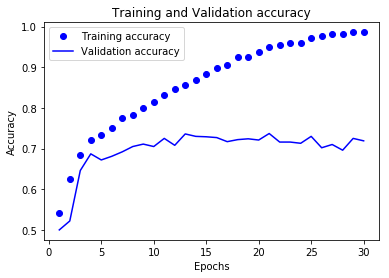

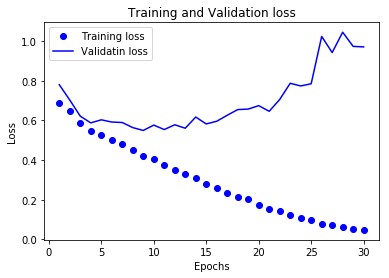

In [12]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                       width_shift_range=0.2,
                                                       height_shift_range=0.2,
                                                       shear_range=0.2,
                                                       zoom_range=0.2,
                                                       horizontal_flip=True,
                                                       fill_mode='nearest')

In [14]:
fnames = [os.path.join(cats_train_dir, fname) for fname in os.listdir(cats_train_dir)]
img_path = fnames[3]
img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_np = keras.preprocessing.image.img_to_array(img)
img_np = np.expand_dims(img_np, axis=0)

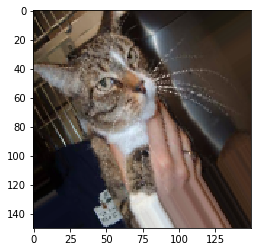

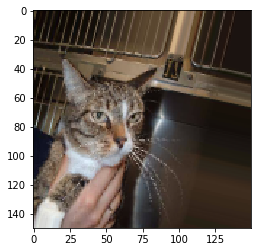

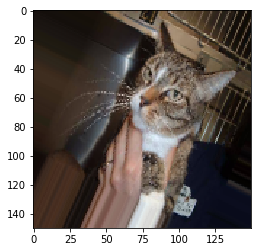

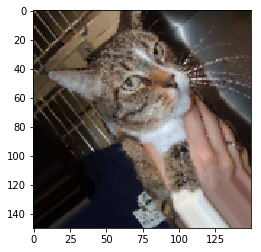

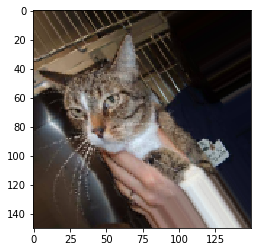

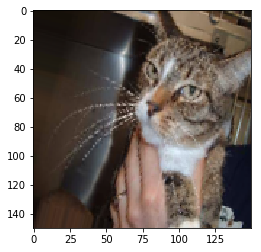

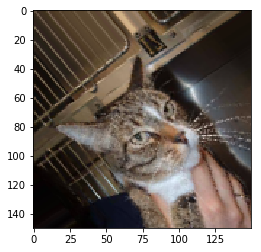

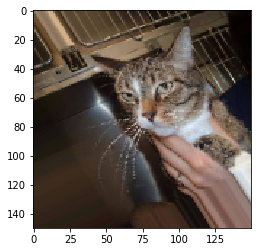

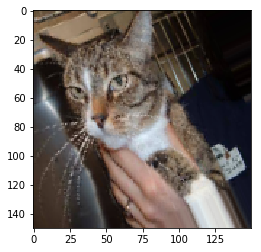

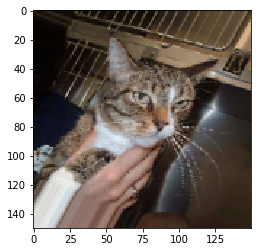

In [15]:
i = 0
for batch in datagen.flow(img_np, batch_size=1):
    plt.figure()
    plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
    i+=1
    if i%10 == 0:
        break
plt.show()

In [16]:
# train the image with data augmentation
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu, input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

In [19]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             rotation_range=40,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True,
                                                             fill_mode='nearest')
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=100,
                              validation_data=val_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 43s 428ms/step - loss: 0.6934 - binary_accuracy: 0.5147 - val_loss: 0.6848 - val_binary_accuracy: 0.5032
Epoch 2/100
100/100 [==============================] - 43s 434ms/step - loss: 0.6821 - binary_accuracy: 0.5656 - val_loss: 0.6543 - val_binary_accuracy: 0.6155
Epoch 3/100
100/100 [==============================] - 43s 427ms/step - loss: 0.6652 - binary_accuracy: 0.5900 - val_loss: 0.6316 - val_binary_accuracy: 0.6320
Epoch 4/100
100/100 [==============================] - 42s 416ms/step - loss: 0.6428 - binary_accuracy: 0.6212 - val_loss: 0.6293 - val_binary_accuracy: 0.6174
Epoch 5/100
100/100 [==============================] - 38s 384ms/step - loss: 0.6326 - binary_accuracy: 0.6309 - val_loss: 0.6036 - val_binary_accuracy: 0.6701
Epoch 6/100
100/100 [==============================] - 44s 443ms/step - loss: 0.6111 - binary_accuracy: 0.6547 - val

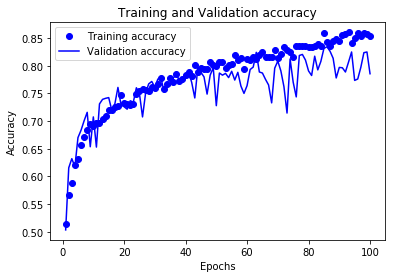

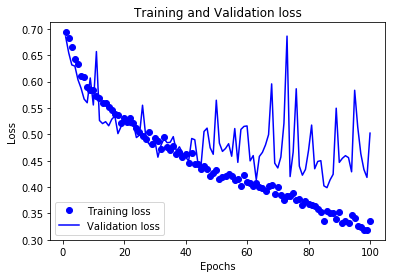

In [20]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [21]:
from tensorflow.keras.applications import VGG16

In [25]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 24s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo